# Image classification of MNIST dataset

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.utils import np_utils

# Loading the data

In [2]:
(X_train,y_train) , (X_test, y_test) = mnist.load_data()
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)


# Data Visualization

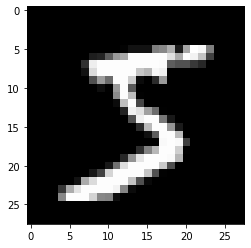

In [3]:
from skimage.io import imread
from skimage.transform import resize
image = X_train[0]
image = resize(image, (28,28), mode='reflect')
plt.imshow(image, cmap='gray')

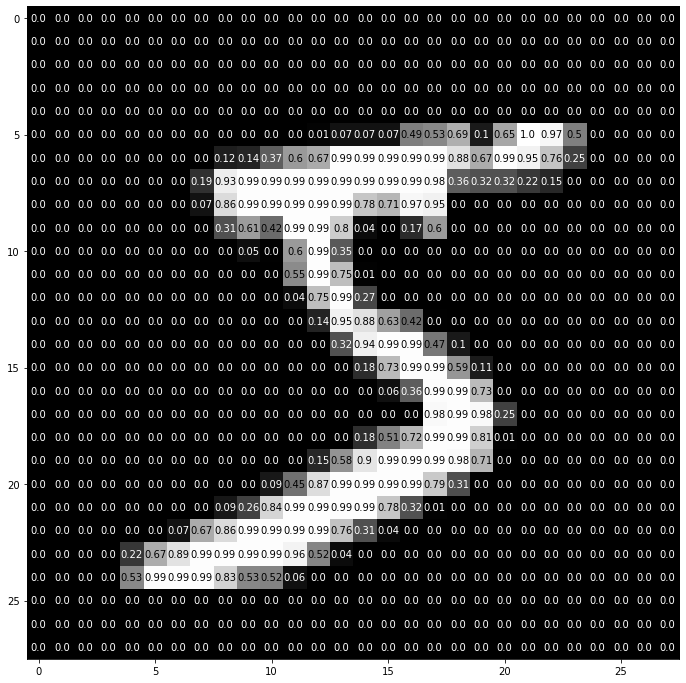

In [4]:
def visualize_input(img, ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thres = img.max()/2.5
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y], 2)), xy = (y,x),
      horizontalalignment= 'center',
      verticalalignment='center',
      color = 'white' if img[x][y]< thres else 'black')

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_input(image,ax)

# Data preprocessing

In [5]:
X_train =  X_train.reshape(60000, 784)
X_test =  X_test.reshape(10000,784)
X_train  = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('New train shape ', X_train.shape)
print('New test shape' , X_test.shape)


New train shape  (60000, 784)
New test shape (10000, 784)


In [6]:
from keras.utils.np_utils import to_categorical
print(y_train.shape)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)

(60000,)
(60000, 10)


# Model Training

In [7]:
def build_model():
  from keras.layers.core import Dense, Dropout, Activation
  model = Sequential()
  model.add(Flatten())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  return model

model = build_model()
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs =10, verbose=1, validation_data=(X_test,y_test))


Epoch 1/10
469/469 [==============================] - 8s 14ms/step - loss: 0.3160 - accuracy: 0.9058 - val_loss: 0.1355 - val_accuracy: 0.9608
Epoch 2/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1511 - accuracy: 0.9551 - val_loss: 0.0988 - val_accuracy: 0.9705
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1124 - accuracy: 0.9661 - val_loss: 0.0833 - val_accuracy: 0.9750
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0938 - accuracy: 0.9718 - val_loss: 0.0722 - val_accuracy: 0.9771
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0806 - accuracy: 0.9746 - val_loss: 0.0680 - val_accuracy: 0.9788
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0728 - accuracy: 0.9773 - val_loss: 0.0659 - val_accuracy: 0.9796
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0678 - accuracy: 0.9793 - val_loss: 0.0636 - val_accuracy: 0.9816

# Model Evaluation

In [8]:
score = model.evaluate(X_test, y_test, batch_size=32, verbose=1, sample_weight=None)
print(score[0], score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0623 - accuracy: 0.9812
0.06232220306992531 0.9811999797821045
